In [1]:
"""
We reproduce the main neural responses demonstrated in Izhikevich (2003) using the 
cortical neuron Izhikevich parameters.

The model is implemented in the Neuron class and updated using RK2.



"""


import numpy as np
import matplotlib.pyplot as plt
from Neuron_class import Neuron



## Initial testing on pre-set parameters


In [7]:
#Izhikevich parameters for the resonator neuron.
a = 0.1
b = 0.26
c = -65
d = 2

neuron = Neuron(a, b, c, d)

neuron.Initialise([c, 0], 0.0)


In [8]:
#simulation parameters

dt = 0.01 # [ms]
N_iter = 50000 # = 500 ms



I_inj = np.ones(N_iter)
I_inj[:int(2/5*N_iter)] = 0.0
#I_inj[500000:] = 0.0
step_height = 200
I_inj = step_height*I_inj - step_height

X, T, spike_times = neuron.update_RK2(dt, N_iter, I_inj)



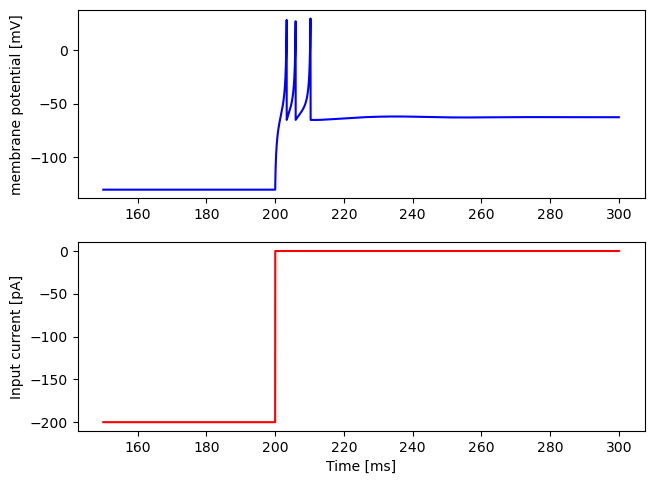

In [9]:
fig, axs = plt.subplots(2, 1)
fig.tight_layout()


axs[0].plot(T[15000:30000], X[0, 15000:30000], c = 'b')
axs[1].plot(T[15000:30000], I_inj[15000:30000], c = 'r')

axs[0].set_ylabel("membrane potential [mV]")
axs[1].set_xlabel("Time [ms]")
axs[1].set_ylabel("Input current [pA]")


plt.show()


## Generating responses for the main cortical neuron types

The plots are reproduced from the Izhikevich paper using a current step of 10.

TC and RZ neurons are very sensitive to this high input so their behaviour is explored more later.


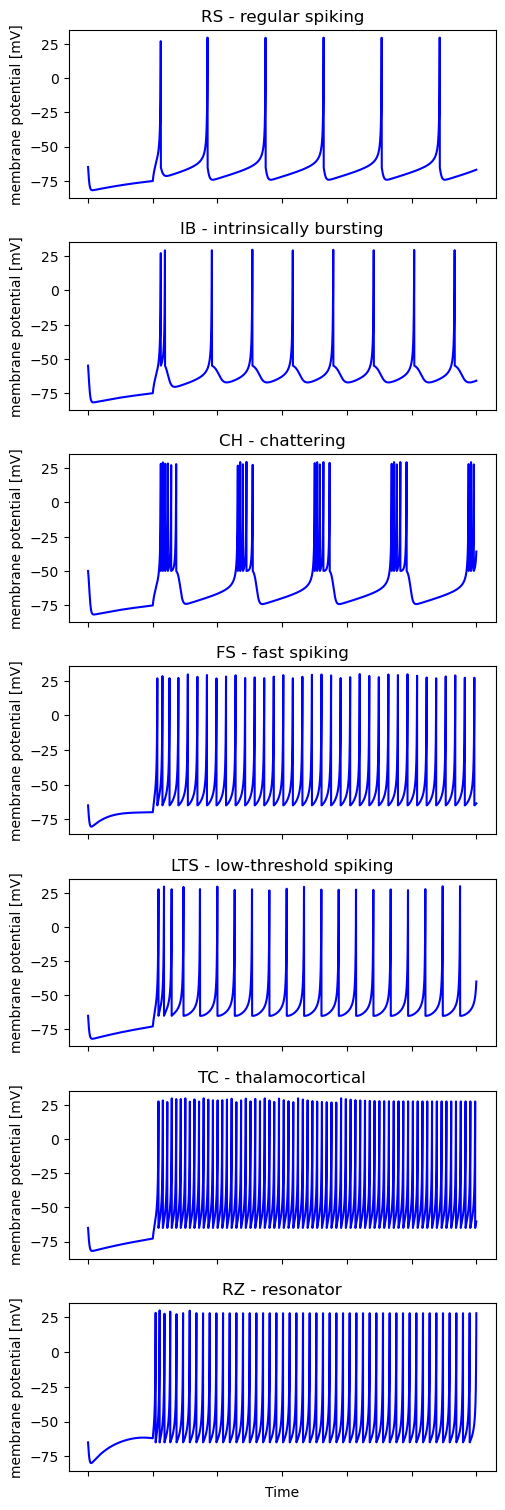

In [10]:
# Plot each type of firing pattern.
# Re-plot TC and RZ with different inputs to show the behaviour.
num = 7 # number of neuron types

labels =     ["RS - regular spiking",  "IB - intrinsically bursting",  
              "CH - chattering", "FS - fast spiking", "LTS - low-threshold spiking",  
              "TC - thalamocortical",  "RZ - resonator"]
a = np.array([0.02,  0.02,  0.02,  0.1,  0.02,  0.02,   0.1])
b = np.array([ 0.2,   0.2,   0.2,  0.2,  0.25,  0.25,  0.26])
c = np.array([ -65,   -55,   -50,  -65,   -65,   -65,  -65 ])
d = np.array([   8,     4,     2,    2,     2,  0.05,    2 ])

fig, axs = plt.subplots(num, 1, figsize = (5, 15))
fig.tight_layout()

## Simulation parameters
dt = 0.01 # [ms]
N_iter = 30000 # = 0.3 seconds

#input step current (step size = 10)
I_inj = np.ones(N_iter)
I_inj[:5000] = 0.0
I_inj = 10*I_inj


for i in range(num):
    neuron = Neuron(a[i], b[i], c[i], d[i])
    neuron.Initialise([c[i], 0], 0.0)

    X, T, spike_times = neuron.update_RK2(dt, N_iter, I_inj)

    axs[i].plot(T, X[0], c = 'b')
    #axs[i].vlines(spike_times, ymin = 25, ymax = 80, colors = 'b')
    #axs[i].set_yticklabels([])
    axs[i].set_xticklabels([])
    axs[i].set_ylabel("membrane potential [mV]")
    axs[i].title.set_text(labels[i])
axs[-1].set_xlabel("Time")
plt.show()
    

## More specific plots on TC and RZ neurons

Start with TC. These neurons respond to depolarizations steps and the offset of hyperpolarizing currents.

In each case, different current magnitudes are needed.


Text(0.5, 80.7222222222222, 'Time [ms]')

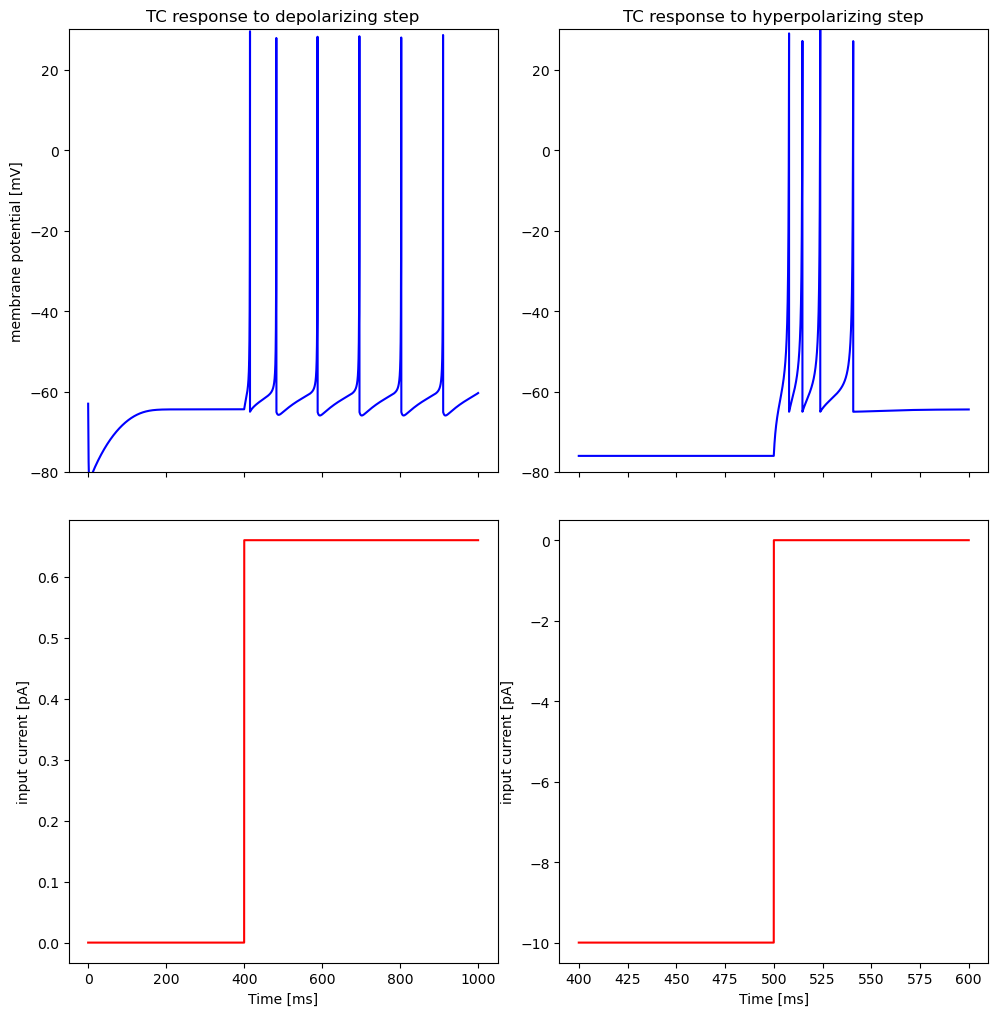

In [15]:
# TC params
a = 0.02
b = 0.25
c = -65
d = 0.05

neuron = Neuron(a, b, c, d)

neuron.Initialise([-63, 0], 0.0)

#simulation parameters
dt = 0.01 # [ms]
N_iter = 100000 # = 0.5 s

#input step current (step size = 10)

#Depolarizing step current
I_dep = np.ones(N_iter)
I_dep[:40000] = 0.0
#I_inj[500000:] = 0.0
step_height_dep = 0.66
I_dep = step_height_dep*I_dep 

#hyperpolarizing step current 
I_hyp = np.ones(N_iter)
I_hyp[:N_iter//2] = 0.0
step_height_hyp = 10
I_hyp = step_height_hyp*I_hyp - step_height_hyp 

neuron.Initialise([-63, 0], 0.0)
X_dep, T, spike_times_dep = neuron.update_RK2(dt, N_iter, I_dep)

neuron.Initialise([-63, 0], 0.0)
X_hyp, T, spike_times_hyp = neuron.update_RK2(dt, N_iter, I_hyp)

fig, axs = plt.subplots(2, 2, figsize = (10, 10))
fig.tight_layout(pad = 1.35)

#depolarizing plots
axs[0][0].plot(T, X_dep[0], c = 'b')
axs[0][0].set_xticklabels([])
axs[0][0].title.set_text("TC response to depolarizing step")
axs[0][0].set_ylim([-80, 30])
axs[0][0].set_ylabel("membrane potential [mV]")

axs[1][0].plot(T, I_dep, c = 'r')
axs[1][0].set_ylabel("input current [pA]")
axs[1][0].set_xlabel("Time [ms]")

#hyperolarizing plots
axs[0][1].plot(T[40000:60000], X_hyp[0][40000:60000], c = 'b')
axs[0][1].set_xticklabels([])
axs[0][1].set_ylim([-80, 30])
axs[0][1].title.set_text("TC response to hyperpolarizing step")


axs[1][1].plot(T[40000:60000], I_hyp[40000:60000], c = 'r')
axs[1][1].set_ylabel("input current [pA]")
axs[1][1].set_xlabel("Time [ms]")


The resonator neuron will oscillate with subthreshold fluctuations. A well timed pulse will shift the behaviour into regular firing. The timing, magnitude and duration of the pulse seem to be important here.

Text(0.5, 80.7222222222222, 'Time [ms]')

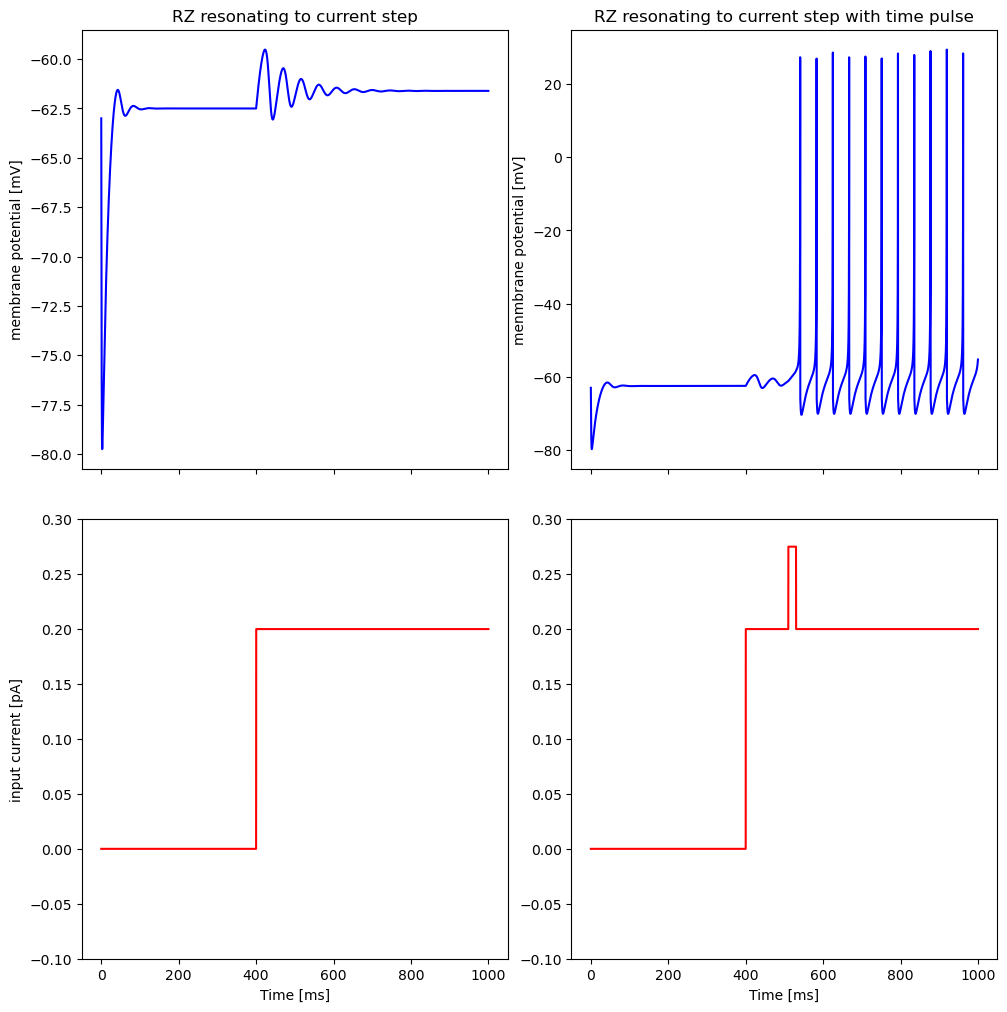

In [19]:
# RZ params
a = 0.1
b = 0.26
c = -65
d = 2

# Create neuron with params
neuron = Neuron(a, b, c, d)

# Simulation parameters
dt = 0.01 # [ms]
N_iter = 100000 # = 1.0 s

# Depolarizing step current
I_1 = np.ones(N_iter)
I_1[:int(0.4*N_iter)] = 0.0
step_height_1 = 0.2
I_1 = step_height_1*I_1 

#Depolarizing step current
I_2 = np.ones(N_iter)
I_2[:int(0.4*N_iter)] = 0.0
step_height_2 = 0.20
pulse = 0.075
I_2 = step_height_2*I_2 
I_2[int(0.51*N_iter):int(0.53*N_iter)] = I_2[int(0.51*N_iter):int(0.53*N_iter)] + pulse # include a timed pulse

neuron.Initialise([-63, 0], 0.0)
X_1, T, spike_times_1 = neuron.update_RK2(dt, N_iter, I_1)
neuron.Initialise([-63, 0], 0.0)
X_2, T, spike_times_2 = neuron.update_RK2(dt, N_iter, I_2)

fig, axs = plt.subplots(2, 2, figsize = (10, 10))
fig.tight_layout(pad = 1.5)

#depolarizing plots
axs[0][0].plot(T, X_1[0], c = 'b')
axs[0][0].set_xticklabels([])
axs[0][0].title.set_text("RZ resonating to current step")
axs[0][0].set_ylabel("membrane potential [mV]")

axs[1][0].plot(T, I_1, c = 'r')
axs[1][0].set_ylim(-0.1, 0.3)
axs[1][0].set_ylabel("input current [pA]")
axs[1][0].set_xlabel("Time [ms]")


axs[0][1].plot(T, X_2[0], c = 'b')
axs[0][1].set_xticklabels([])
axs[0][1].title.set_text("RZ resonating to current step with time pulse")
axs[0][1].set_ylabel("menmbrane potential [mV]")

axs[1][1].plot(T, I_2, c = 'r')
axs[1][1].set_ylim(-0.1, 0.3)
axs[1][1].set_xlabel("Time [ms]")
